/tmp/ipykernel_54031/178588064.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stability_df['Day'][stability_df['Day']>1344] -= offset
/tmp/ipykernel_54031/178588064.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stability_df_retrain['Day'][stability_df_retrain['Day']>1344] -= offset


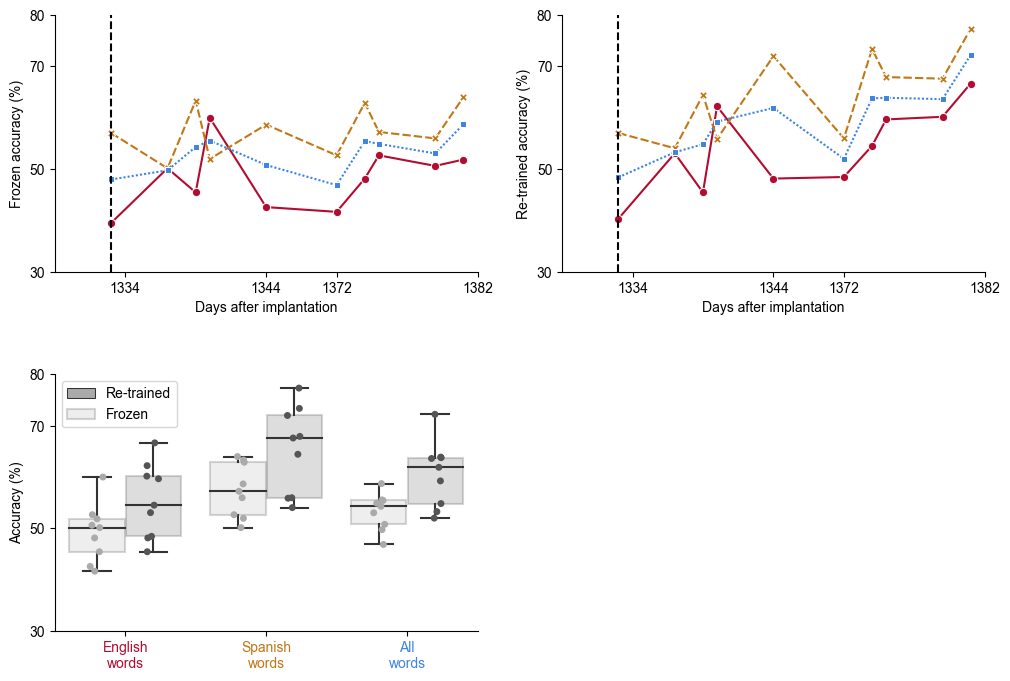

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# load the source data for each panel 
stability_df_retrain = pd.read_excel('./figure_E7_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)
stability_df = pd.read_excel('./figure_E7_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)

    


import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
    
fig,axs = plt.subplots(2,2,figsize=(12,8),gridspec_kw={'wspace':0.2,'hspace':0.4})


mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})#, 'font.sans-serif': 'Arial'})



colors = ['#b20d30','#c17817','#3f84e5','#3f784c']
ax = axs[0,0]

stability_df['Accuracy'] *= 100
first_day = 1333
stability_df.Day += first_day
# make the axes aesthetically nice but offset for the break
offset = 23
stability_df['Day'][stability_df['Day']>1344] -= offset
sns.lineplot(
    data=stability_df,
    x="Day", y='Accuracy', hue = 'Language', style= 'Language',
    markers=True, dashes=True,ax=ax,palette=colors[:-1]
)
ax.get_legend().remove()
ax.set_ylabel('Frozen accuracy (%)')
ax.set_xlabel('Days after implantation')
ax.axvline(first_day,color='k',linestyle='--')
ax.set_xlim([first_day-4,np.max(stability_df.Day)+1])
ax.set_xticks([first_day+1,first_day+11,first_day+16,first_day+26])

#ax.set_xticks([1240,1250,1255,1265])
ax.set_xticklabels([first_day+1,first_day+11,first_day+offset+16,first_day+offset+26])
ax.set_ylim([30,80])
ax.set_yticks([30,50,70,80])



ax = axs[0,1]
stability_df_retrain['Accuracy'] *= 100
stability_df_retrain.Day += first_day
offset = 23
colors = ['#b20d30','#c17817','#3f84e5','#3f784c']
stability_df_retrain['Day'][stability_df_retrain['Day']>1344] -= offset
sns.lineplot(
    data=stability_df_retrain,
    x="Day", y='Accuracy', hue = 'Language', style= 'Language',
    markers=True, dashes=True,ax=ax,palette=colors[:-1]
)
ax.get_legend().remove()
ax.set_ylabel('Re-trained accuracy (%)')
ax.set_xlabel('Days after implantation')
ax.axvline(first_day,color='k',linestyle='--')
ax.set_xlim([first_day-4,np.max(stability_df.Day)+1])
ax.set_xticks([first_day+1,first_day+11,first_day+16,first_day+26])

#ax.set_xticks([1240,1250,1255,1265])
ax.set_xticklabels([first_day+1,first_day+11,first_day+offset+16,first_day+offset+26])
ax.set_ylim([30,80])
ax.set_yticks([30,50,70,80])


ax = axs[1,0]

import pandas as pd
stability_ov = pd.concat((stability_df,stability_df_retrain))
stability_ov['Paradigm'] = np.concatenate((np.repeat('Frozen',30),np.repeat('Re-trained',30)))

def hex_to_rgb(hex_code):
    return(tuple(int(hex_code.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))


cols = [colors[0],colors[0],colors[1],colors[1],colors[2],colors[2]]
cols = [colors[0],colors[1],colors[2]]
cols = [hex_to_rgb(col) for col in cols]
cols = [(col[0]/255., col[1]/255., col[2]/255. ) for col in cols]


from statannot import add_stat_annotation
g = sns.boxplot(ax=ax,data=stability_ov[stability_ov.Day > first_day],x='Language',y='Accuracy',hue='Paradigm',
            order=['English','Spanish','Overall'],
            palette='binary',dodge=True,boxprops=dict(alpha=.2))
pvalue_thresholds = [[1e-4, "****"], [0.001, "**"], [0.01, "*"], [1, "ns"]]

# test_results = add_stat_annotation(ax, data=stability_ov[stability_ov.Day > first_day],x='Language',y='Accuracy',hue='Paradigm',
#                                    order=['English','Spanish','Overall'],
#                                    box_pairs = [ [('Overall','Re-trained'),('Overall','Frozen')],[('Spanish','Re-trained'),('Spanish','Frozen')],
#                                                 [('English','Re-trained'),('English','Frozen')] ], 
#                                    test='Wilcoxon', text_format='star',
#                                    loc='inside', verbose=2,line_offset=0.12,pvalue_thresholds=pvalue_thresholds)



g = sns.stripplot(ax=ax,data=stability_ov[stability_ov.Day > first_day],x='Language',y='Accuracy',hue='Paradigm',
            order=['English','Spanish','Overall'],
            palette='binary',dodge=True)

 
ax.legend(['Re-trained','Frozen'])#,[], frameon=False)



#ax.legend().set_title('')
#ax.legend(['Before 1251','After 1251'])
ax.set_ylim([30,80])
ax.set_yticks([30,50,70,80])
ax.set_xticks([0,1,2])
ax.set_xlim([-0.5,2.5])
ax.set_xticklabels(['English\nwords','Spanish\nwords','All\nwords'])
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('')
[t.set_color(cols[i]) for i,t in enumerate(ax.xaxis.get_ticklabels())]


ax = axs[1,1]
ax.set_visible(False)
plt.savefig('./figure_E7.jpg',dpi=300)